titanic prediction model

In [28]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_predict
import seaborn as sns

In [29]:
#convert csv file into dataframe
df=pd.read_csv('tested.csv')

In [30]:
#display first five value of dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [31]:
#display last five value of dataset
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [32]:
#get the information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [33]:
#check shape or totalsize
df.shape

(418, 12)

In [34]:
#get statistical information about dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [35]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [36]:
#seperate features and target
x=df.drop(['Survived'],axis=1)
y=df['Survived']
print(x)
print(y)

     PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0 

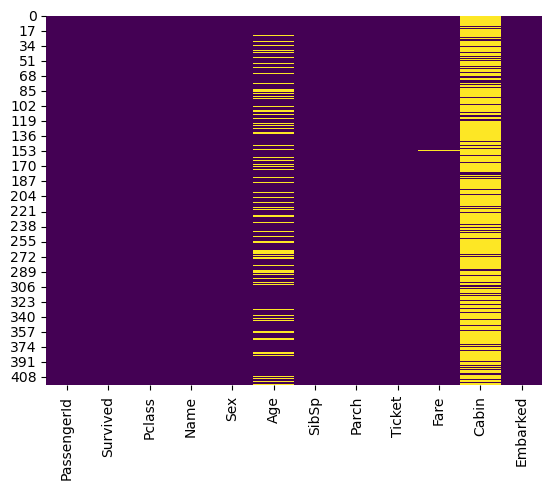

In [37]:
sns.heatmap(df.isnull(),cbar=False,cmap="viridis")
plt.show()

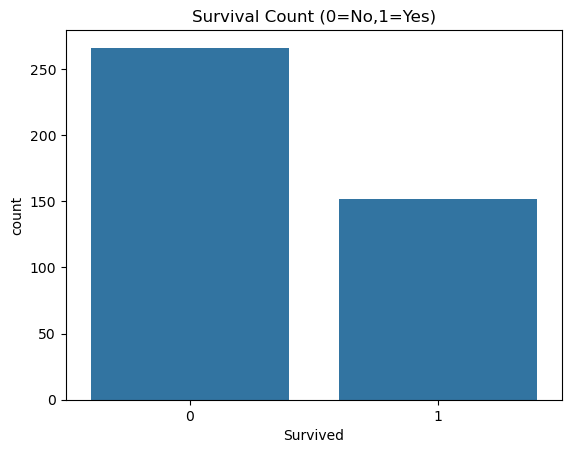

In [38]:
sns.countplot(data=df,x='Survived')
plt.title("Survival Count (0=No,1=Yes)")
plt.show()

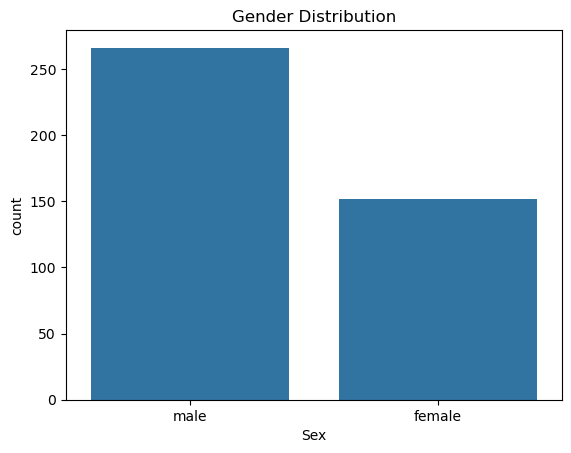

In [39]:
sns.countplot(data=df,x='Sex')
plt.title('Gender Distribution')
plt.show()

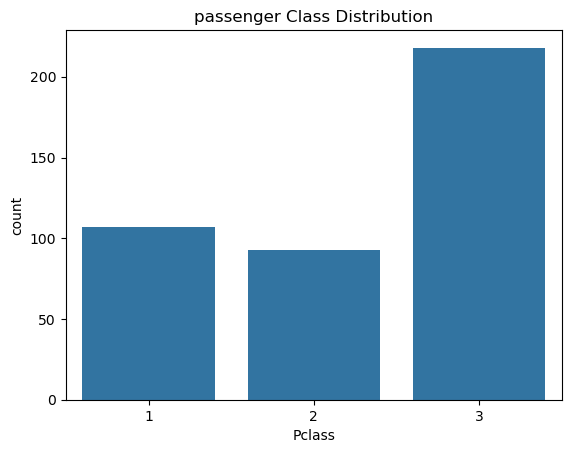

In [40]:
sns.countplot(data=df,x='Pclass')
plt.title("passenger Class Distribution")
plt.show()

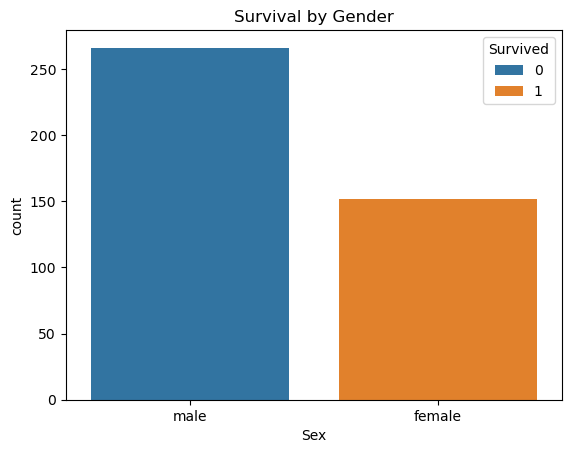

In [41]:
sns.countplot(data=df,x='Sex',hue='Survived')
plt.title("Survival by Gender")
plt.show()

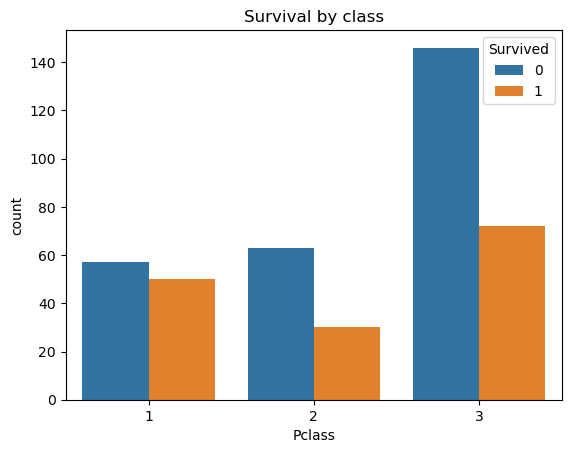

In [42]:
sns.countplot(data=df,x='Pclass',hue='Survived')
plt.title("Survival by class")
plt.show()

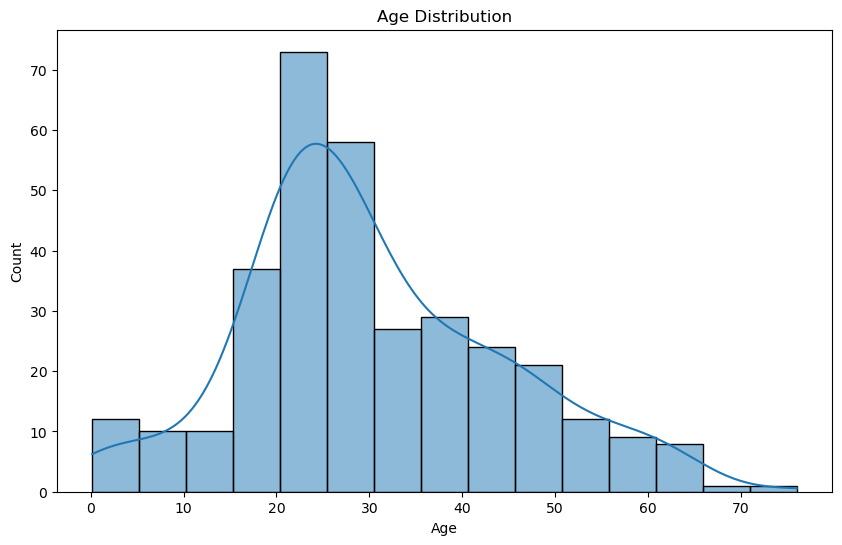

In [43]:
plt.figure(figsize=(10,6))
sns.histplot(df['Age'].dropna(),kde=True)
plt.title("Age Distribution")
plt.show()

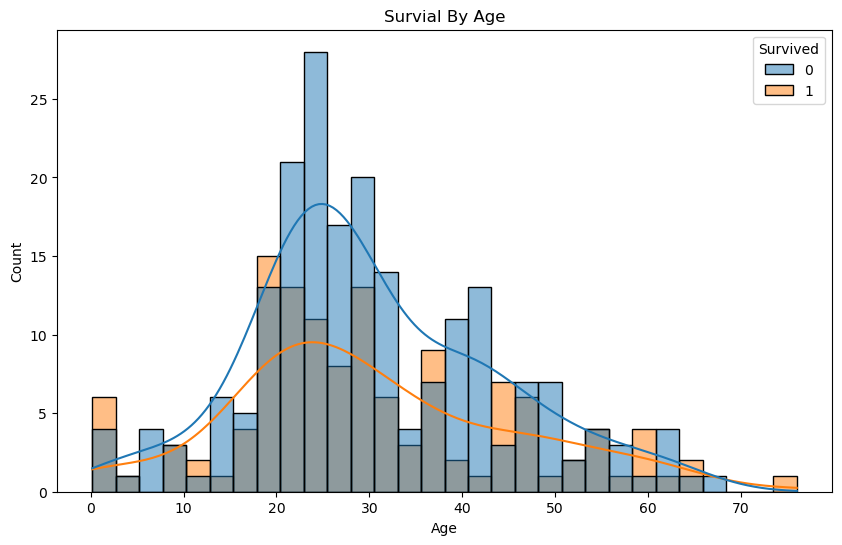

In [44]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='Age',hue='Survived',bins=30,kde=True)
plt.title("Survial By Age")
plt.show()

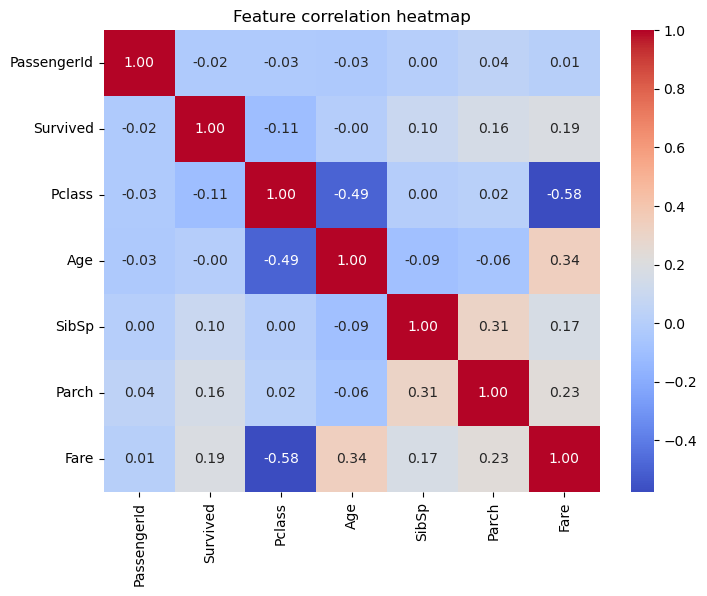

In [45]:
#visualizing Corelation as heatmap
plt.figure(figsize=(8,6))
numeric_df=df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title("Feature correlation heatmap")
plt.show()

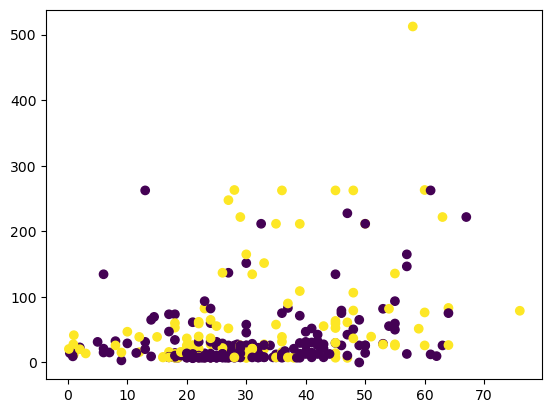

In [50]:
plt.scatter(df['Age'],df['Fare'],c=df['Survived'])

In [46]:
df.dropna().shape

(87, 12)

In [53]:
df.drop(['Name'],axis=1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,male,NaN,0,0,359309,8.0500,NaN,S


In [101]:
x=df.drop(['Survived'],axis=1)
y=df['Survived']
print(x)
print(y)

     PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0 

In [102]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
(x_train.shape),(x_test.shape),(y_train.shape),(y_test.shape)

((334, 11), (84, 11), (334,), (84,))